R² score: 0.727
Mean Absolute Error: 1.67 mpg


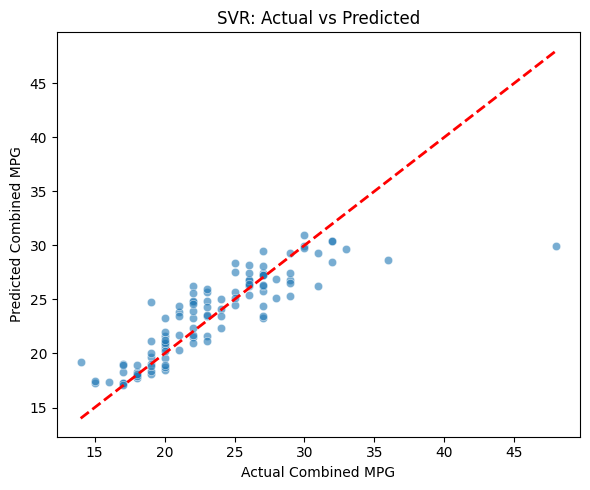

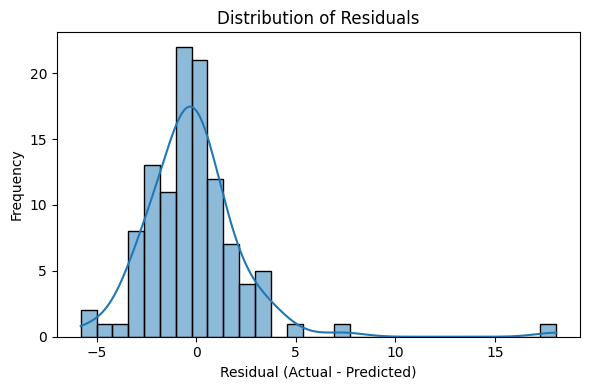

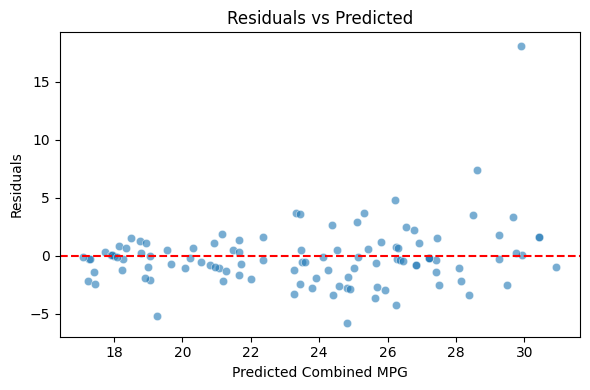

Train Score: 0.338
Test Score: 0.727


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load data
df = pd.read_csv('Car Data P.csv')

# 2. Define features and target
feature_cols = [
    'cylinders', 'displacement', 'year',
    'is_high_performance', 'is_luxury', 'is_electric', 'is_diesel', 'is_hybrid',
    'is_automatic', 'is_manual',
    'make_encoded', 'class_encoded', 'drive_encoded', 'fuel_type_encoded',
    'transmission_encoded', 'size_category_encoded', 'drivetrain_type_encoded'
]
X = df[feature_cols].copy()
y = df['combination_mpg'].copy()

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train SVR with RBF kernel (default C=1.0, epsilon=0.1)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# 6. Predict and evaluate
y_pred = svr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f} mpg")

# 7. Plot results
# (a) Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Combined MPG')
plt.ylabel('Predicted Combined MPG')
plt.title('SVR: Actual vs Predicted')
plt.tight_layout()
plt.show()

# (b) Residuals histogram
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

# (c) Residuals vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Combined MPG')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()
Train_Score = svr.score(X_train_scaled, y_train)
Test_Score = svr.score(X_test_scaled, y_test)
print(f"Train Score: {Train_Score:.3f}")
print(f"Test Score: {Test_Score:.3f}")